#Projeto - Análise de Risco de Crédito

### **Grupo: Josenildo Vicente de Araújo (jva@cin.ufpe.br), Lucas Thierry Chaves Muniz (ltcm@cin.ufpe.br), Nicholas Henrique Justino Ferreira (nhjf@cin.ufpe.br), Renato Joaquim Miranda Ferreira (rjmf@cin.ufpe.br)**

O seguinte Projeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito

#Organização e separação dos dados

In [1]:
! pip install optuna
import numpy as np
import pandas as pd
import gdown
import os
import optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 209 kB 45.3 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 3.7 MB/s 
     |████████████████████████████████| 149 kB 55.8 MB/s 
     |████████████████████████████████| 112 kB 47.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=563842a5e60733ad1d3d64e6535ac19ee6359127919e0f76bf5032d5636505b6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
def pull_dataset_file(name_file):
  file_id = '11JVg39uGJsYZZPKssnVoALl4A4RG7gI8'
  url = 'https://drive.google.com/uc?id='+file_id

  gdown.download(url, name_file, quiet=False)


In [3]:
name_file = "TRNcod.csv"

In [4]:
if not os.path.exists('/content/'+name_file):
  print("Arquivo não existe ainda")
  print("Fazendo downloading...")
  pull_dataset_file(name_file)
  print("Download finalizado!")

Arquivo não existe ainda
Fazendo downloading...


Downloading...
From: https://drive.google.com/uc?id=11JVg39uGJsYZZPKssnVoALl4A4RG7gI8
To: /content/TRNcod.csv
100%|██████████| 766M/766M [00:05<00:00, 144MB/s]


Download finalizado!


In [5]:
print("Lendo arquivo...")
dataset = pd.read_csv(name_file)

Lendo arquivo...


In [6]:
dataset 

,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,0.135098,1,0.222222,0.0,0,0,0,0,0,1,1,5.881235e-18,0.041667,0.000000,0.000000,0.105588,0.796392,-5.140958e-17,0.0,0.1,1.316491e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,0.273504,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.013889,0.000000,0.000000,0.147356,0.979968,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,0.281910,0,1.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.500000,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.0,-2.188272e-17,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,0.225741,0,0.111111,0.0,1,1,0,0,0,0,0,4.788559e-01,0.083333,0.115789,0.055556,0.147356,0.398645,8.325188e-02,0.2,0.3,4.859488e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,0.480403,0,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.111111,0.151604,0.398645,-5.140958e-17,0.0,0.5,1.689438e-01,0.458333,1,1,1,1,0,0,0,0,0,1,...,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389191,389191,1,1,0,0,0,0,1,0.787827,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.055556,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,8.574793e-02,0.000000,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1
389192,389192,1,0,1,0,0,0,1,0.470010,1,0.111111,0.0,0,0,0,0,0,1,1,5.881235e-18,0.208333,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,8.546104e-02,0.000000,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,1,0
389193,389193,0,1,0,1,0,0,1,0.436048,0,0.000000,0.0,0,0,0,0,0,1,1,5.881235e-18,0.111111,0.000000,0.083333,0.152666,0.398645,-5.140958e-17,0.0,0.4,1.698044e-01,0.000000,0,1,1,1,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1
389194,389194,1,0,1,0,1,0,0,0.677875,0,0.111111,0.0,1,1,0,0,0,0,0,5.881235e-18,0.388889,0.000000,0.000000,0.147356,0.398645,-5.140958e-17,0.0,0.1,1.388212e-01,0.000000,0,1,1,1,0,0,0,0,0,1,...,1,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0


In [7]:
dataset.drop(columns=['INDEX'], inplace=True)

In [8]:
dataset.describe()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,NIVEL_RELACIONAMENTO_CREDITO02,BANCO_REST_IRPF_ULTIMA_1,BANCO_REST_IRPF_ULTIMA_2,BANCO_REST_IRPF_ULTIMA_3,BANCO_REST_IRPF_ULTIMA_4,BANCO_REST_IRPF_ULTIMA_5,BANCO_REST_IRPF_ULTIMA_6,BANCO_REST_IRPF_ULTIMA_7,ATIVIDADE_EMAIL,EXPOSICAO_ENDERECO,EXPOSICAO_EMAIL,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,ATUALIZACAO_EMAIL,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,VALOR_PARCELA_BOLSA_FAMILIA,FLAG_BOLSA_FAMILIA_1,SIGLA_PARTIDO_FILIADO_1,SIGLA_PARTIDO_FILIADO_2,SIGLA_PARTIDO_FILIADO_3,SIGLA_PARTIDO_FILIADO_4,SIGLA_PARTIDO_FILIADO_5,SIGLA_PARTIDO_FILIADO_6,SIGLA_PARTIDO_FILIADO_7,FLAG_FILIADO_PARTIDO_POLITICO_1,FLAG_PROUNI_1,RENDA_VIZINHANCA_1,...,CEP1_3,CEP1_4,CEP1_5,CEP2_1,CEP2_2,CEP2_3,CEP2_4,CEP2_5,CEP2_6,CEP2_7,CEP2_8,CEP2_9,CEP3_1,CEP3_2,CEP3_3,CEP3_4,CEP3_5,CEP3_6,CEP3_7,CEP3_8,CEP3_9,CEP3_10,CEP3_11,CEP3_12,CEP4_1,CEP4_2,CEP4_3,CEP4_4,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,3.891960e+05,3.891960e+05,3.891960e+05,389196.000000,389196.000000,3.891960e+05,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,...,389196.000000,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.00000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000,389196.000000
mean,0.889274,0.691952,0.476552,0.296195,0.241179,0.218011,0.186836,4.552049e-01,0.521514,0.134915,0.002071,0.076828,0.033330,0.017015,0.015362,0.011848,0.926109,0.919508,1.259255e-01,0.093091,0.037783,0.063266,1.959749e-01,5.938128e-01,7.677453e-02,0.099535,0.159769,2.032828e-01,0.057815,0.211993,0.964923,0.892833,0.852432,0.086612,0.074618,0.069137,0.059446,0.229172,0.578819,0.079364,...,0.389344,0.36792,0.352971,0.791557,0.587570,0.468240,0.414927,0.372478,0.356062,0.341576,0.337578,0.330011,0.750403,0.607314,0.450488,0.395862,0.379302,0.333115,0.329926,0.320209,0.346702,0.332462,0.375312,0.378904,0.806082,0.691636,0.598113,0.51306,0.475825,0.437052,0.423378,0.417540,0.425708,0.459820,0.440842,0.436896,0.433709,0.440339,0.655449,0.344551
std,0.313793,0.461687,0.499451,0.456579,0.427799,0.412895,0.389781,2.537459e-01,0.499538,0.133136,0.043717,0.266318,0.179498,0.129326,0.122990,0.108200,0.261593,0.272053,2.457121e-01,0.160208,0.110964,0.144057,1.781598e-01,3.524863e-01,1.888183e-01,0.195807,0.205465,2.510087e-01,0.145072,0.408721,0.183976,0.309326,0.354672,0.281266,0.262774,0.253688,0.236457,0.420301,0.493749,0.270306,...,0.487602,0.48224,0.477894,0.406195,0.492272,0.498991,0.492710,0.483465,0.478835,0.474239,0.472884,0.470217,0.432780,0.488349,0.497543,0.489036,0.485214,0.471328,0.470187,0.466557,0.475920,0.471096,0.484204,0.485115,0.395366,0.461818,0.490280,0.49983,0.499416,0.496022,0.494095,0.493154,0.494451,0.498384,0.496489,0.496002,0.495587,0.496428,0.475222,0.475222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.881235e-18,0.000000,0.000000,0.000000,2.044015e-16,1.591218e-16,-5.140958e-17,0.000000,0.000000,-2.188272e-17,0.000000,0.000000,0

In [9]:
print("Separando classes...")
class_1 = dataset[dataset['IND_BOM_1_1']==1]
class_2 = dataset[dataset['IND_BOM_1_2']==1]
class_1 = class_1.sample(frac=1)
class_2 = class_2.sample(frac=1)

Separando classes...


In [10]:
print("Dividindo dados em treinamento, validação e teste")
class_1_train, class_1_validate, class_1_test = np.split(class_1,[int(0.5*len(class_1)),int(0.75*len(class_1))])
class_2_train, class_2_validate, class_2_test = np.split(class_2,[int(0.5*len(class_2)),int(0.75*len(class_2))])  

Dividindo dados em treinamento, validação e teste


In [11]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 67049 Validação: 33524 Teste: 33525


In [12]:
print("Repetindo dados de treino e validação da classe 2")
while len(class_2_train) < len(class_1_train):
  count = (len(class_1_train)-len(class_2_train)) % len(class_2_train)
  class_2_train = pd.concat([class_2_train[:count],class_2_train])
while len(class_2_validate) < len(class_1_validate):
  count = (len(class_1_validate)-len(class_2_validate)) % len(class_2_validate)
  class_2_validate = pd.concat([class_2_validate[:count],class_2_validate])


Repetindo dados de treino e validação da classe 2


In [13]:
print("Classe 1 - ","Treino:",len(class_1_train),"Validação:",len(class_1_validate),"Teste:",len(class_1_test))
print("Classe 2 - ","Treino:",len(class_2_train),"Validação:",len(class_2_validate),"Teste:",len(class_2_test))

Classe 1 -  Treino: 127549 Validação: 63774 Teste: 63775
Classe 2 -  Treino: 127549 Validação: 63774 Teste: 33525


In [14]:
print("Juntandos dados das classes de acordo com o tipo de separação")
data_train = pd.concat([class_1_train,class_2_train])
data_train = data_train.sample(frac=1)
data_validate = pd.concat([class_1_validate,class_2_validate])
data_validate = data_validate.sample(frac=1)
data_test = pd.concat([class_1_test,class_2_test])
data_test = data_test.sample(frac=1)

Juntandos dados das classes de acordo com o tipo de separação


In [15]:
print("Treinamento:",len(data_train),"Validação:",len(data_validate),"Teste:",len(data_test))

Treinamento: 255098 Validação: 127548 Teste: 97300


In [16]:
print(data_train.iloc[0])

UF_1           0.0
UF_2           1.0
UF_3           0.0
UF_4           0.0
UF_5           1.0
              ... 
CEP4_12        1.0
CEP4_13        0.0
CEP4_14        0.0
IND_BOM_1_1    1.0
IND_BOM_1_2    0.0
Name: 160169, Length: 245, dtype: float64


In [59]:
x_train = data_train.iloc[:,:-2]
y_train = data_train.iloc[:,-2:]
x_validate = data_validate.iloc[:,:-2]
y_validate = data_validate.iloc[:,-2:]
x_test = data_test.iloc[:,:-2]
y_test = data_test.iloc[:,-2:]

#Classificadores

In [65]:
! pip install scikit-plot
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, roc_auc_score, average_precision_score, ConfusionMatrixDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt

In [19]:
def my_metrics(y_true,y_pred):
  y_true = y_true['IND_BOM_1_1']
  y_pred = y_pred['IND_BOM_1_1']
  skplt.metrics.plot_confusion_matrix(y_true, y_pred,normalize=True)
  plt.show()
  print()
  print(classification_report(y_true,y_pred))
  print("Erro quadrático médio: ",mean_squared_error(y_true,y_pred))
  print("Auroc:", roc_auc_score(y_true,y_pred))
  print("Precisão média: ", average_precision_score(y_true, y_pred))
  print()
  

In [20]:
def pred_name_columns(arr):
    result = pd.DataFrame(arr, columns = ['IND_BOM_1_1','IND_BOM_1_2'])
    return result

In [21]:
def pred_scores_transf(arr):
  pred_score = []
  for a,b in arr:
    if a > b:
      pred_score.append([1,0])
    else:
      pred_score.append([0,1])
  
  return pred_name_columns(pred_score)

##MLP

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, optimizers

In [23]:
input_dim = x_train.shape[1]

### Modelo 1

In [ ]:
mlp_classifier = Sequential()
mlp_classifier.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier.add(Dense(2, activation='sigmoid'))
mlp_classifier.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
mlp_history = mlp_classifier.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2009 - val_loss: 0.2334
Epoch 2/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1994 - val_loss: 0.2344
Epoch 3/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1979 - val_loss: 0.2356
Epoch 4/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1964 - val_loss: 0.2381
Epoch 5/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1951 - val_loss: 0.2388
Epoch 6/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1937 - val_loss: 0.2393
Epoch 7/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.1925 - val_loss: 0.2404
Epoch 8/10000
3986/3986 [==============================] - 14s 4ms/step - loss: 0.1912 - val_loss: 0.2433
Epoch 9/10000
3986/3986 [==============================] - 11s 3ms/step - loss: 0.1897 - val_loss: 0.2437
Epoch 10/10000
3986/3986 [====================

In [ ]:
mlp_y_pred_scores = mlp_classifier.predict(x_test)

In [ ]:
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)

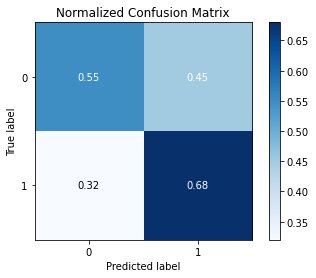


              precision    recall  f1-score   support

           0       0.47      0.55      0.51     33525
           1       0.74      0.68      0.71     63775

    accuracy                           0.63     97300
   macro avg       0.61      0.62      0.61     97300
weighted avg       0.65      0.63      0.64     97300

Erro quadrático médio:  0.3656731757451182
Auroc: 0.6153976844044431
Precisão média:  0.7145144993719219



In [ ]:
my_metrics(y_test,y_pred_mlp)

### Modelo 2

In [28]:
mlp_classifier2 = Sequential()
mlp_classifier2.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier2.add(Dense(2, activation='sigmoid'))
mlp_classifier2.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
mlp_history = mlp_classifier2.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2277 - val_loss: 0.2264
Epoch 2/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2236 - val_loss: 0.2280
Epoch 3/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2229 - val_loss: 0.2229
Epoch 4/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2225 - val_loss: 0.2240
Epoch 5/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2223 - val_loss: 0.2239
Epoch 6/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2221 - val_loss: 0.2230
Epoch 7/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2219 - val_loss: 0.2253
Epoch 8/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2219 - val_loss: 0.2245
Epoch 9/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.2218 - val_loss: 0.2227
Epoch 10/10000
3986/3986 [====================

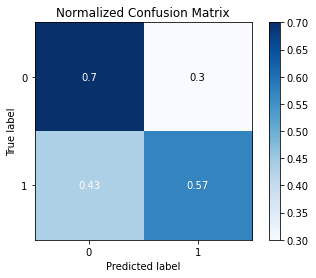


              precision    recall  f1-score   support

           0       0.46      0.70      0.56     33525
           1       0.79      0.57      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300

Erro quadrático médio:  0.3838848920863309
Auroc: 0.6367840308270565
Precisão média:  0.7294616726816491



In [33]:
mlp_y_pred_scores = mlp_classifier2.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 3

In [37]:
mlp_classifier3 = Sequential()
mlp_classifier3.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier3.add(Dense(30, activation=layers.ReLU()))
mlp_classifier3.add(Dense(2, activation='sigmoid'))
mlp_classifier3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
mlp_history = mlp_classifier3.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2270 - val_loss: 0.2231
Epoch 2/10000
3986/3986 [==============================] - 15s 4ms/step - loss: 0.2219 - val_loss: 0.2224
Epoch 3/10000
3986/3986 [==============================] - 15s 4ms/step - loss: 0.2199 - val_loss: 0.2221
Epoch 4/10000
3986/3986 [==============================] - 15s 4ms/step - loss: 0.2183 - val_loss: 0.2216
Epoch 5/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2166 - val_loss: 0.2222
Epoch 6/10000
3986/3986 [==============================] - 15s 4ms/step - loss: 0.2147 - val_loss: 0.2222
Epoch 7/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2128 - val_loss: 0.2240
Epoch 8/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2110 - val_loss: 0.2242
Epoch 9/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2088 - val_loss: 0.2253
Epoch 10/10000
3986/3986 [====================

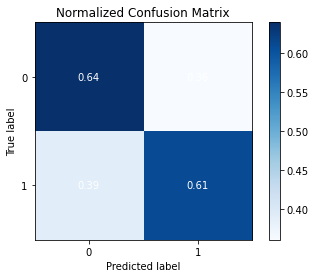


              precision    recall  f1-score   support

           0       0.46      0.64      0.53     33525
           1       0.76      0.61      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.61      0.62      0.61     97300
weighted avg       0.66      0.62      0.63     97300

Erro quadrático médio:  0.38108941418293935
Auroc: 0.6229783994871512
Precisão média:  0.7199566662136974



In [38]:
mlp_y_pred_scores = mlp_classifier3.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 4

In [40]:
mlp_classifier4 = Sequential()
mlp_classifier4.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier4.add(Dense(60, activation=layers.ReLU()))
mlp_classifier4.add(Dense(2, activation='sigmoid'))
mlp_classifier4.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
mlp_history = mlp_classifier4.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2265 - val_loss: 0.2231
Epoch 2/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2218 - val_loss: 0.2227
Epoch 3/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2198 - val_loss: 0.2219
Epoch 4/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2179 - val_loss: 0.2237
Epoch 5/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2161 - val_loss: 0.2220
Epoch 6/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2142 - val_loss: 0.2238
Epoch 7/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2123 - val_loss: 0.2262
Epoch 8/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.2102 - val_loss: 0.2246
Epoch 9/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2077 - val_loss: 0.2271
Epoch 10/10000
3986/3986 [====================

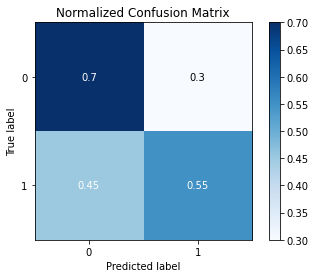


              precision    recall  f1-score   support

           0       0.45      0.70      0.55     33525
           1       0.78      0.55      0.65     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.63      0.60     97300
weighted avg       0.66      0.60      0.61     97300

Erro quadrático médio:  0.3966906474820144
Auroc: 0.6255934024205975
Precisão média:  0.7226788377786078



In [41]:
mlp_y_pred_scores = mlp_classifier4.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 5

In [42]:
mlp_classifier5 = Sequential()
mlp_classifier5.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier5.add(Dense(100, activation=layers.ReLU()))
mlp_classifier5.add(Dense(2, activation='sigmoid'))
mlp_classifier5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
mlp_history = mlp_classifier5.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 15s 4ms/step - loss: 0.2265 - val_loss: 0.2232
Epoch 2/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2218 - val_loss: 0.2219
Epoch 3/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2200 - val_loss: 0.2218
Epoch 4/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2182 - val_loss: 0.2217
Epoch 5/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2163 - val_loss: 0.2230
Epoch 6/10000
3986/3986 [==============================] - 14s 4ms/step - loss: 0.2143 - val_loss: 0.2242
Epoch 7/10000
3986/3986 [==============================] - 14s 4ms/step - loss: 0.2120 - val_loss: 0.2248
Epoch 8/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2095 - val_loss: 0.2262
Epoch 9/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2069 - val_loss: 0.2278
Epoch 10/10000
3986/3986 [====================

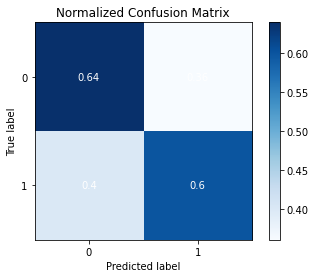


              precision    recall  f1-score   support

           0       0.46      0.64      0.53     33525
           1       0.76      0.60      0.67     63775

    accuracy                           0.61     97300
   macro avg       0.61      0.62      0.60     97300
weighted avg       0.66      0.61      0.62     97300

Erro quadrático médio:  0.3864131551901336
Auroc: 0.6197237035614405
Precisão média:  0.7181443007039556



In [43]:
mlp_y_pred_scores = mlp_classifier5.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 6

In [44]:
mlp_classifier6 = Sequential()
mlp_classifier6.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier6.add(Dense(60, activation='sigmoid'))
mlp_classifier6.add(Dense(30, activation='sigmoid'))
mlp_classifier6.add(Dense(2, activation='sigmoid'))
mlp_classifier6.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
mlp_history = mlp_classifier6.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 18s 4ms/step - loss: 0.2300 - val_loss: 0.2295
Epoch 2/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2257 - val_loss: 0.2270
Epoch 3/10000
3986/3986 [==============================] - 14s 4ms/step - loss: 0.2250 - val_loss: 0.2264
Epoch 4/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2241 - val_loss: 0.2255
Epoch 5/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2240 - val_loss: 0.2248
Epoch 6/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2239 - val_loss: 0.2244
Epoch 7/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2235 - val_loss: 0.2247
Epoch 8/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2234 - val_loss: 0.2236
Epoch 9/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2236 - val_loss: 0.2239
Epoch 10/10000
3986/3986 [====================

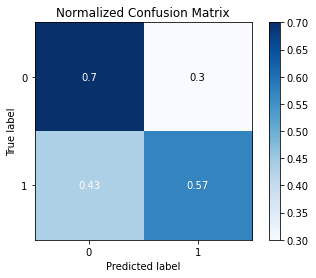


              precision    recall  f1-score   support

           0       0.46      0.70      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.61      0.62     97300

Erro quadrático médio:  0.38547790339157245
Auroc: 0.6340761690448482
Precisão média:  0.7276916920170203



In [45]:
mlp_y_pred_scores = mlp_classifier6.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 7

In [46]:
mlp_classifier7 = Sequential()
mlp_classifier7.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier7.add(Dense(120, activation='sigmoid'))
mlp_classifier7.add(Dense(60, activation='sigmoid'))
mlp_classifier7.add(Dense(30, activation='sigmoid'))
mlp_classifier7.add(Dense(2, activation='sigmoid'))
mlp_classifier7.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
mlp_history = mlp_classifier7.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 19s 5ms/step - loss: 0.2302 - val_loss: 0.2261
Epoch 2/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2254 - val_loss: 0.2258
Epoch 3/10000
3986/3986 [==============================] - 18s 5ms/step - loss: 0.2243 - val_loss: 0.2257
Epoch 4/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2240 - val_loss: 0.2247
Epoch 5/10000
3986/3986 [==============================] - 17s 4ms/step - loss: 0.2236 - val_loss: 0.2269
Epoch 6/10000
3986/3986 [==============================] - 19s 5ms/step - loss: 0.2242 - val_loss: 0.2262
Epoch 7/10000
3986/3986 [==============================] - 18s 5ms/step - loss: 0.2242 - val_loss: 0.2249
Epoch 8/10000
3986/3986 [==============================] - 16s 4ms/step - loss: 0.2236 - val_loss: 0.2242
Epoch 9/10000
3986/3986 [==============================] - 18s 5ms/step - loss: 0.2237 - val_loss: 0.2255
Epoch 10/10000
3986/3986 [====================

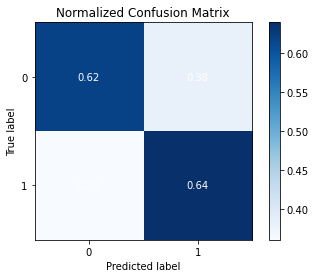


              precision    recall  f1-score   support

           0       0.47      0.62      0.54     33525
           1       0.76      0.64      0.70     63775

    accuracy                           0.63     97300
   macro avg       0.62      0.63      0.62     97300
weighted avg       0.66      0.63      0.64     97300

Erro quadrático médio:  0.3671634121274409
Auroc: 0.6297108852635176
Precisão média:  0.7235486963516027



In [47]:
mlp_y_pred_scores = mlp_classifier7.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

### Modelo 8

In [48]:
mlp_classifier8 = Sequential()
mlp_classifier8.add(Dense(245, activation=layers.ReLU(), input_dim=input_dim))
mlp_classifier8.add(Dense(2, activation='sigmoid'))
mlp_classifier8.compile(optimizer=optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')
mlp_history = mlp_classifier8.fit(x_train, y_train, batch_size=64, epochs=10000, 
                         callbacks=[EarlyStopping(patience=10)], validation_data=(x_validate, y_validate))

Epoch 1/10000
3986/3986 [==============================] - 13s 3ms/step - loss: 0.4999 - val_loss: 0.5000
Epoch 2/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 3/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 4/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 5/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 6/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 7/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 8/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 9/10000
3986/3986 [==============================] - 12s 3ms/step - loss: 0.5000 - val_loss: 0.5000
Epoch 10/10000
3986/3986 [====================

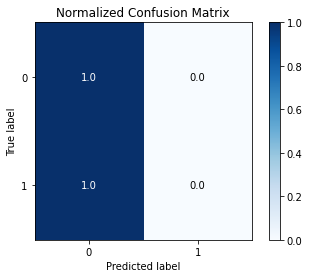


              precision    recall  f1-score   support

           0       0.34      1.00      0.51     33525
           1       0.00      0.00      0.00     63775

    accuracy                           0.34     97300
   macro avg       0.17      0.50      0.26     97300
weighted avg       0.12      0.34      0.18     97300

Erro quadrático médio:  0.6554470709146968
Auroc: 0.5
Precisão média:  0.6554470709146968



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
mlp_y_pred_scores = mlp_classifier8.predict(x_test)
y_pred_mlp = pred_scores_transf(mlp_y_pred_scores)
my_metrics(y_test,y_pred_mlp)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimators = [50,100,128]
maxDeep = [2,5,8]
maxFeatures = [None, 'sqrt']

params: estimadores 50, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31698 32076]]



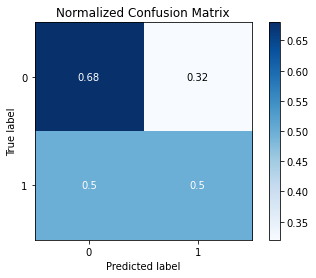

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088578417536927

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50296359, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23124 10401]
 [31660 32115]]



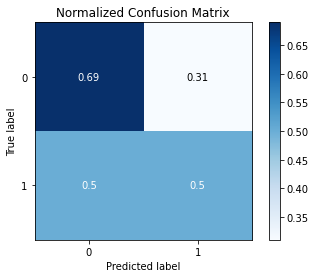

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.43228160328879756

Auroc:
(array([0.        , 0.31024609, 1.        ]), array([0.        , 0.50356723, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 2, Features sqrt
Matriz confusão:
[[43620 20154]
 [31751 32023]]



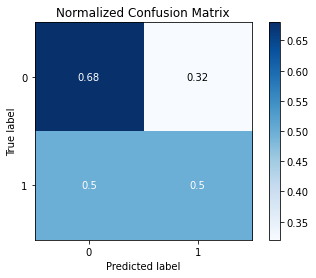

              precision    recall  f1-score   support

           0       0.58      0.68      0.63     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.60      0.59      0.59    127548
weighted avg       0.60      0.59      0.59    127548


Erro quadrático médio:  0.4069448364537272

Auroc:
(array([0.       , 0.3160222, 1.       ]), array([0.        , 0.50213253, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22985 10540]
 [31693 32082]]



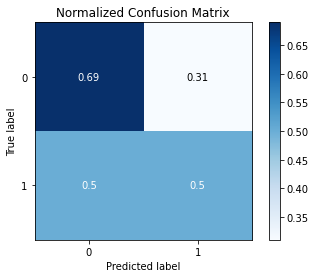

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.75      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.59      0.56     97300
weighted avg       0.64      0.57      0.57     97300


Erro quadrático médio:  0.43404933196300105

Auroc:
(array([0.        , 0.31439224, 1.        ]), array([0.        , 0.50304978, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 5, Features None
Matriz confusão:
[[42960 20814]
 [27331 36443]]



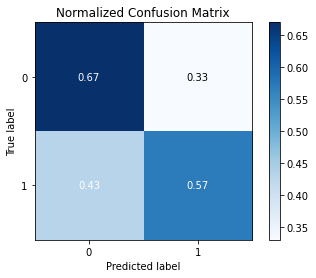

              precision    recall  f1-score   support

           0       0.61      0.67      0.64     63774
           1       0.64      0.57      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.377465738388685

Auroc:
(array([0.        , 0.32637125, 1.        ]), array([0.        , 0.57143977, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22771 10754]
 [27055 36720]]



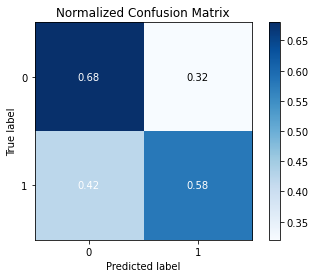

              precision    recall  f1-score   support

           0       0.46      0.68      0.55     33525
           1       0.77      0.58      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.66      0.61      0.62     97300


Erro quadrático médio:  0.38858170606372044

Auroc:
(array([0.        , 0.32077554, 1.        ]), array([0.        , 0.57577421, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 5, Features sqrt
Matriz confusão:
[[43897 19877]
 [28719 35055]]



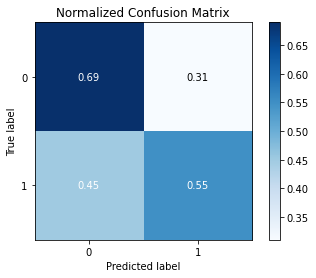

              precision    recall  f1-score   support

           0       0.60      0.69      0.64     63774
           1       0.64      0.55      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.381001662119359

Auroc:
(array([0.        , 0.31167874, 1.        ]), array([0.        , 0.54967542, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23181 10344]
 [28560 35215]]



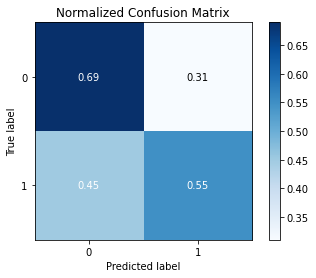

              precision    recall  f1-score   support

           0       0.45      0.69      0.54     33525
           1       0.77      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.3998355601233299

Auroc:
(array([0.        , 0.30854586, 1.        ]), array([0.        , 0.55217562, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 8, Features None
Matriz confusão:
[[42420 21354]
 [25071 38703]]



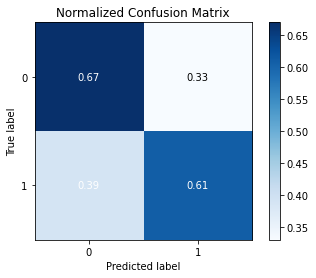

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     63774
           1       0.64      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.3639806190610594

Auroc:
(array([0.        , 0.33483865, 1.        ]), array([0.        , 0.60687741, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22583 10942]
 [25009 38766]]



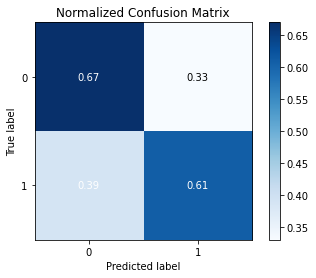

              precision    recall  f1-score   support

           0       0.47      0.67      0.56     33525
           1       0.78      0.61      0.68     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.67      0.63      0.64     97300


Erro quadrático médio:  0.369486125385406

Auroc:
(array([0.       , 0.3263833, 1.       ]), array([0.        , 0.60785574, 1.        ]), array([2, 1, 0]))
params: estimadores 50, maxDepht 8, Features sqrt
Matriz confusão:
[[43912 19862]
 [27353 36421]]



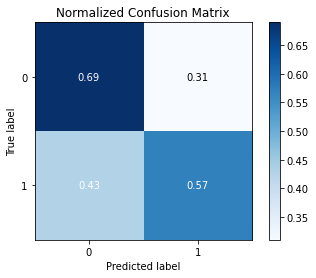

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.57      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.63      0.63      0.63    127548
weighted avg       0.63      0.63      0.63    127548


Erro quadrático médio:  0.37017436572898044

Auroc:
(array([0.        , 0.31144353, 1.        ]), array([0.       , 0.5710948, 1.       ]), array([2, 1, 0]))
Matriz confusão:
[[23240 10285]
 [27279 36496]]



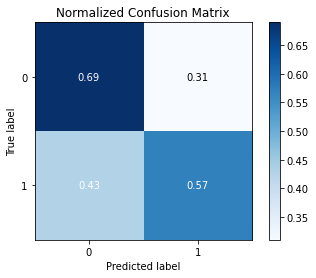

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.38606372045220966

Auroc:
(array([0.        , 0.30678598, 1.        ]), array([0.        , 0.57226186, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31695 32079]]



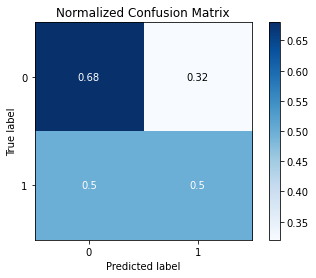

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088343211967259

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50301063, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23122 10403]
 [31657 32118]]



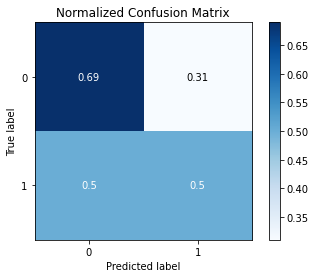

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.4322713257965057

Auroc:
(array([0.        , 0.31030574, 1.        ]), array([0.        , 0.50361427, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 2, Features sqrt
Matriz confusão:
[[42994 20780]
 [31417 32357]]



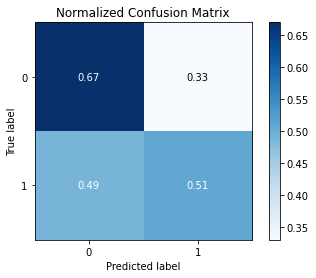

              precision    recall  f1-score   support

           0       0.58      0.67      0.62     63774
           1       0.61      0.51      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4092341706651614

Auroc:
(array([0.        , 0.32583812, 1.        ]), array([0.        , 0.50736977, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22596 10929]
 [31327 32448]]



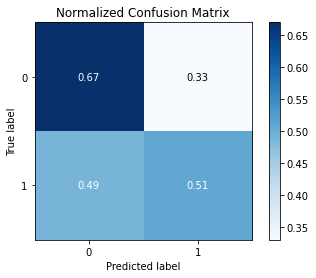

              precision    recall  f1-score   support

           0       0.42      0.67      0.52     33525
           1       0.75      0.51      0.61     63775

    accuracy                           0.57     97300
   macro avg       0.58      0.59      0.56     97300
weighted avg       0.63      0.57      0.58     97300


Erro quadrático médio:  0.4342857142857143

Auroc:
(array([0.        , 0.32599553, 1.        ]), array([0.        , 0.50878871, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 5, Features None
Matriz confusão:
[[43361 20413]
 [27630 36144]]



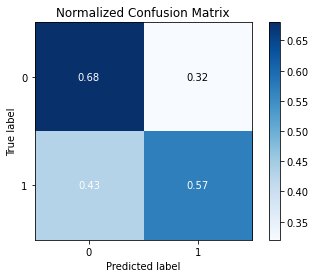

              precision    recall  f1-score   support

           0       0.61      0.68      0.64     63774
           1       0.64      0.57      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.3766660394518142

Auroc:
(array([0.        , 0.32008342, 1.        ]), array([0.        , 0.56675134, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22993 10532]
 [27354 36421]]



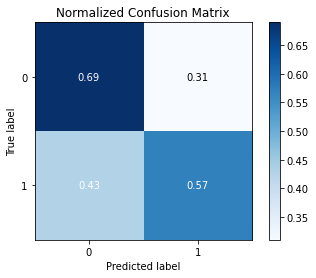

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.3893730729701953

Auroc:
(array([0.        , 0.31415362, 1.        ]), array([0.        , 0.57108585, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 5, Features sqrt
Matriz confusão:
[[44323 19451]
 [29022 34752]]



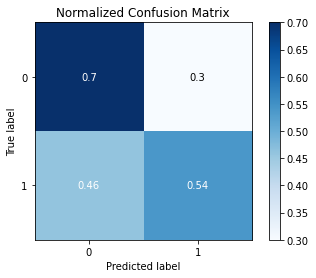

              precision    recall  f1-score   support

           0       0.60      0.70      0.65     63774
           1       0.64      0.54      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.38003731928372064

Auroc:
(array([0.       , 0.3049989, 1.       ]), array([0.        , 0.54492426, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23501 10024]
 [28904 34871]]



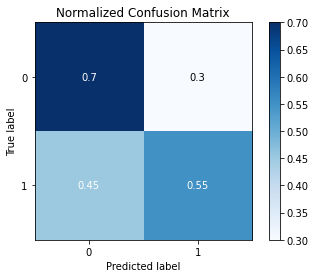

              precision    recall  f1-score   support

           0       0.45      0.70      0.55     33525
           1       0.78      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.40008221993833504

Auroc:
(array([0.        , 0.29900075, 1.        ]), array([0.        , 0.54678165, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 8, Features None
Matriz confusão:
[[42497 21277]
 [24971 38803]]



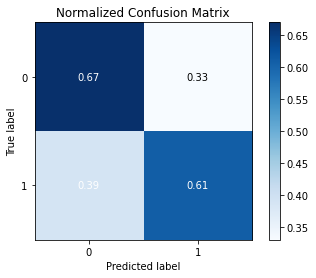

              precision    recall  f1-score   support

           0       0.63      0.67      0.65     63774
           1       0.65      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.3625929062000188

Auroc:
(array([0.        , 0.33363126, 1.        ]), array([0.        , 0.60844545, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22627 10898]
 [24830 38945]]



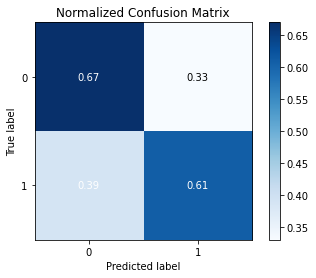

              precision    recall  f1-score   support

           0       0.48      0.67      0.56     33525
           1       0.78      0.61      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.63      0.64     97300


Erro quadrático médio:  0.36719424460431654

Auroc:
(array([0.        , 0.32507084, 1.        ]), array([0.        , 0.61066249, 1.        ]), array([2, 1, 0]))
params: estimadores 100, maxDepht 8, Features sqrt
Matriz confusão:
[[44148 19626]
 [27412 36362]]



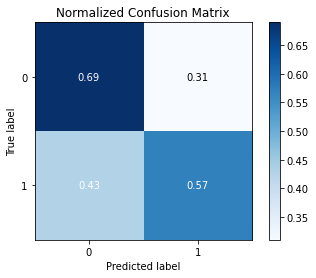

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.57      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.63      0.63      0.63    127548
weighted avg       0.63      0.63      0.63    127548


Erro quadrático médio:  0.36878665286793993

Auroc:
(array([0.        , 0.30774297, 1.        ]), array([0.        , 0.57016966, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23410 10115]
 [27245 36530]]



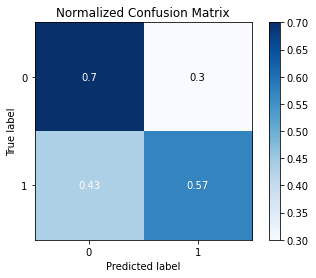

              precision    recall  f1-score   support

           0       0.46      0.70      0.56     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300


Erro quadrático médio:  0.383967112024666

Auroc:
(array([0.        , 0.30171514, 1.        ]), array([0.        , 0.57279498, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 2, Features None
Matriz confusão:
[[43323 20451]
 [31695 32079]]



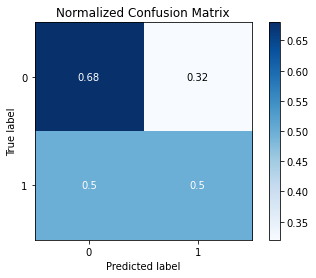

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.50      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4088343211967259

Auroc:
(array([0.        , 0.32067927, 1.        ]), array([0.        , 0.50301063, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23122 10403]
 [31657 32118]]



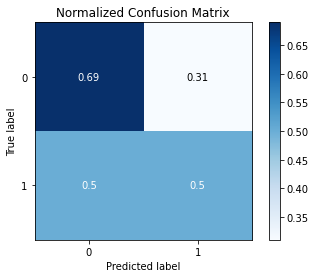

              precision    recall  f1-score   support

           0       0.42      0.69      0.52     33525
           1       0.76      0.50      0.60     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.60      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.4322713257965057

Auroc:
(array([0.        , 0.31030574, 1.        ]), array([0.        , 0.50361427, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 2, Features sqrt
Matriz confusão:
[[43108 20666]
 [31437 32337]]



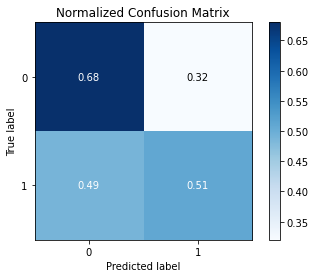

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     63774
           1       0.61      0.51      0.55     63774

    accuracy                           0.59    127548
   macro avg       0.59      0.59      0.59    127548
weighted avg       0.59      0.59      0.59    127548


Erro quadrático médio:  0.4084971932135353

Auroc:
(array([0.        , 0.32405055, 1.        ]), array([0.        , 0.50705617, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[22677 10848]
 [31270 32505]]



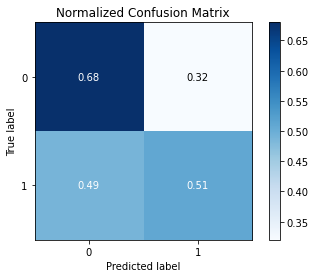

              precision    recall  f1-score   support

           0       0.42      0.68      0.52     33525
           1       0.75      0.51      0.61     63775

    accuracy                           0.57     97300
   macro avg       0.59      0.59      0.56     97300
weighted avg       0.64      0.57      0.58     97300


Erro quadrático médio:  0.43286742034943476

Auroc:
(array([0.        , 0.32357942, 1.        ]), array([0.        , 0.50968248, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 5, Features None
Matriz confusão:
[[43589 20185]
 [27794 35980]]



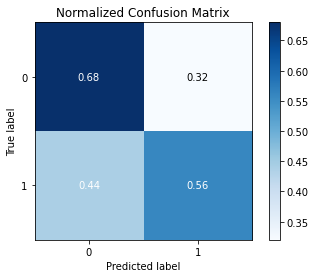

              precision    recall  f1-score   support

           0       0.61      0.68      0.65     63774
           1       0.64      0.56      0.60     63774

    accuracy                           0.62    127548
   macro avg       0.63      0.62      0.62    127548
weighted avg       0.63      0.62      0.62    127548


Erro quadrático médio:  0.37616426756985605

Auroc:
(array([0.        , 0.31650829, 1.        ]), array([0.        , 0.56417976, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23102 10423]
 [27543 36232]]



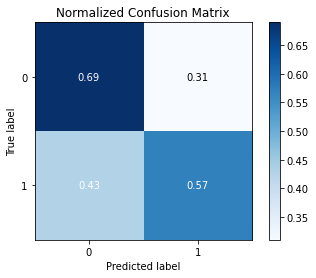

              precision    recall  f1-score   support

           0       0.46      0.69      0.55     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.61     97300
   macro avg       0.62      0.63      0.60     97300
weighted avg       0.67      0.61      0.62     97300


Erro quadrático médio:  0.39019527235354573

Auroc:
(array([0.        , 0.31090231, 1.        ]), array([0.       , 0.5681223, 1.       ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 5, Features sqrt
Matriz confusão:
[[43972 19802]
 [28813 34961]]



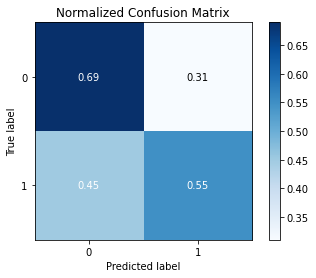

              precision    recall  f1-score   support

           0       0.60      0.69      0.64     63774
           1       0.64      0.55      0.59     63774

    accuracy                           0.62    127548
   macro avg       0.62      0.62      0.62    127548
weighted avg       0.62      0.62      0.62    127548


Erro quadrático médio:  0.38115062564681534

Auroc:
(array([0.        , 0.31050271, 1.        ]), array([0.        , 0.54820146, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23243 10282]
 [28766 35009]]



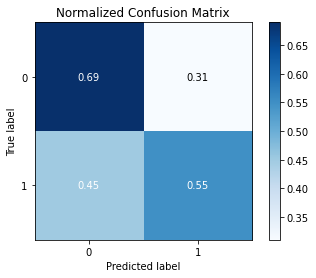

              precision    recall  f1-score   support

           0       0.45      0.69      0.54     33525
           1       0.77      0.55      0.64     63775

    accuracy                           0.60     97300
   macro avg       0.61      0.62      0.59     97300
weighted avg       0.66      0.60      0.61     97300


Erro quadrático médio:  0.40131551901336077

Auroc:
(array([0.       , 0.3066965, 1.       ]), array([0.        , 0.54894551, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 8, Features None
Matriz confusão:
[[42332 21442]
 [24872 38902]]



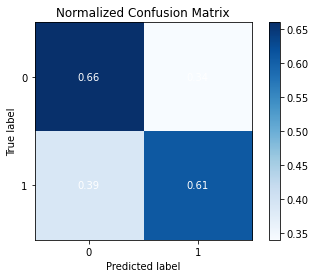

              precision    recall  f1-score   support

           0       0.63      0.66      0.65     63774
           1       0.64      0.61      0.63     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.64    127548
weighted avg       0.64      0.64      0.64    127548


Erro quadrático médio:  0.36311035845328815

Auroc:
(array([0.        , 0.33621852, 1.        ]), array([0.       , 0.6099978, 1.       ]), array([2, 1, 0]))
Matriz confusão:
[[22511 11014]
 [24744 39031]]



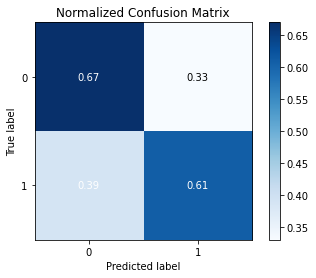

              precision    recall  f1-score   support

           0       0.48      0.67      0.56     33525
           1       0.78      0.61      0.69     63775

    accuracy                           0.63     97300
   macro avg       0.63      0.64      0.62     97300
weighted avg       0.68      0.63      0.64     97300


Erro quadrático médio:  0.36750256937307296

Auroc:
(array([0.        , 0.32853095, 1.        ]), array([0.        , 0.61201098, 1.        ]), array([2, 1, 0]))
params: estimadores 128, maxDepht 8, Features sqrt
Matriz confusão:
[[44124 19650]
 [27092 36682]]



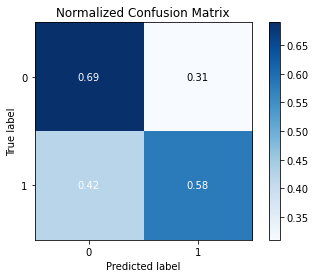

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     63774
           1       0.65      0.58      0.61     63774

    accuracy                           0.63    127548
   macro avg       0.64      0.63      0.63    127548
weighted avg       0.64      0.63      0.63    127548


Erro quadrático médio:  0.3664659579138834

Auroc:
(array([0.       , 0.3081193, 1.       ]), array([0.        , 0.57518738, 1.        ]), array([2, 1, 0]))
Matriz confusão:
[[23286 10239]
 [26996 36779]]



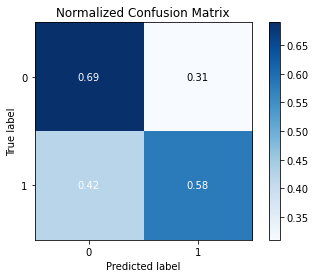

              precision    recall  f1-score   support

           0       0.46      0.69      0.56     33525
           1       0.78      0.58      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.64      0.61     97300
weighted avg       0.67      0.62      0.63     97300


Erro quadrático médio:  0.3826824254881809

Auroc:
(array([0.        , 0.30541387, 1.        ]), array([0.        , 0.57669933, 1.        ]), array([2, 1, 0]))


In [ ]:
for est in estimators:
  for deep in maxDeep:
    for feat in maxFeatures:
      rf_classifier = RandomForestClassifier(n_estimators=est,max_depth=deep,min_samples_leaf=2,min_samples_split=4,max_features=feat)
      print('params: estimadores {}, maxDepht {}, Features {}'.format(est,deep,feat))
      rf_history = rf_classifier.fit(x_train, y_train)
      
      rf_pred_class_val = rf_classifier.predict(x_validate)
      y_pred_rf_val = pred_name_columns(rf_pred_class_val)
      my_metrics(y_validate,y_pred_rf_val)

      #rf_prb_val = rf_classifer.predict_proba(x_validate)
      # skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_1'], rf_prb_val)
      # plt.show()

      rf_pred_class_test = rf_classifier.predict(x_test)
      y_pred_rf_test = pred_name_columns(rf_pred_class_test)
      my_metrics(y_test,y_pred_rf_test)

      #rf_prb_tst = rf_classifer.predict_proba(x_test)
      # skplt.metrics.plot_ks_statistic(y_test['IND_BOM_1_1'], rf_prb_tst)
      # plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=2,min_samples_split=4,max_features='sqrt')
rf_history = rf_classifier.fit(x_train, y_train)

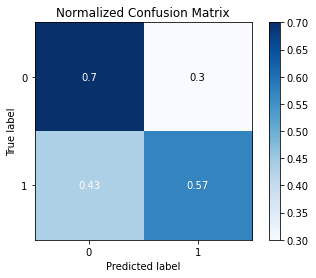


              precision    recall  f1-score   support

           0       0.62      0.70      0.66     63774
           1       0.66      0.57      0.61     63774

    accuracy                           0.64    127548
   macro avg       0.64      0.64      0.63    127548
weighted avg       0.64      0.64      0.63    127548

Erro quadrático médio:  0.3643255872299056
Auroc: 0.6356744127700944
Precisão média:  0.5889437141700351



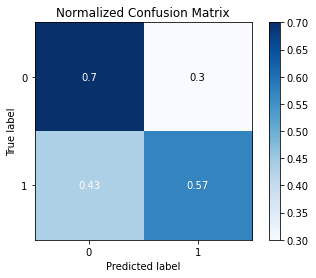


              precision    recall  f1-score   support

           0       0.46      0.70      0.56     33525
           1       0.78      0.57      0.66     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.67      0.62      0.62     97300

Erro quadrático médio:  0.3846043165467626
Auroc: 0.6348699096229607
Precisão média:  0.7281765530155566



In [ ]:
rf_pred_class_val = rf_classifier.predict(x_validate)
y_pred_rf_val = pred_name_columns(rf_pred_class_val)
my_metrics(y_validate,y_pred_rf_val)

# rf_prb_val = rf_classifier.predict_proba(x_validate)
# skplt.metrics.plot_ks_statistic(y_validate['IND_BOM_1_2'], rf_prb_val)
# plt.show()

rf_pred_class_test = rf_classifier.predict(x_test)
y_pred_rf_test = pred_name_columns(rf_pred_class_test)
my_metrics(y_test,y_pred_rf_test)

##Ensemble

##SVM

In [51]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

### Modelo 1

In [56]:
clf = LinearSVC(C=1.3, max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [63]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.66      0.54     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



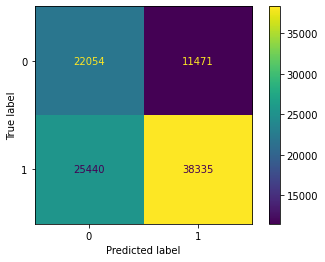

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 2

In [69]:
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

In [70]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.66      0.54     33525
           1       0.77      0.60      0.68     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



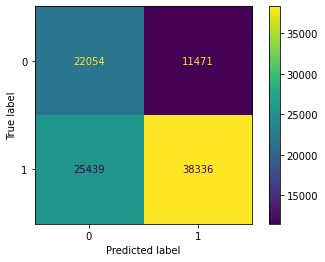

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

### Modelo 3

In [72]:
clf = SGDClassifier(max_iter=10000)
clf.fit(x_train,y_train['IND_BOM_1_1'])
y_pred = clf.predict(x_test)

In [73]:
print(classification_report(y_test['IND_BOM_1_1'], y_pred))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55     33525
           1       0.77      0.59      0.67     63775

    accuracy                           0.62     97300
   macro avg       0.62      0.63      0.61     97300
weighted avg       0.66      0.62      0.63     97300



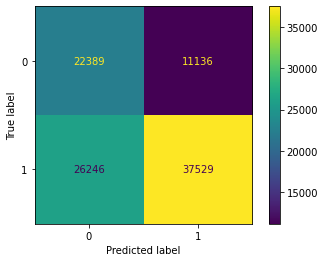

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test['IND_BOM_1_1'], y_pred);

##Meta Classificador